time series ends   2011-12-30


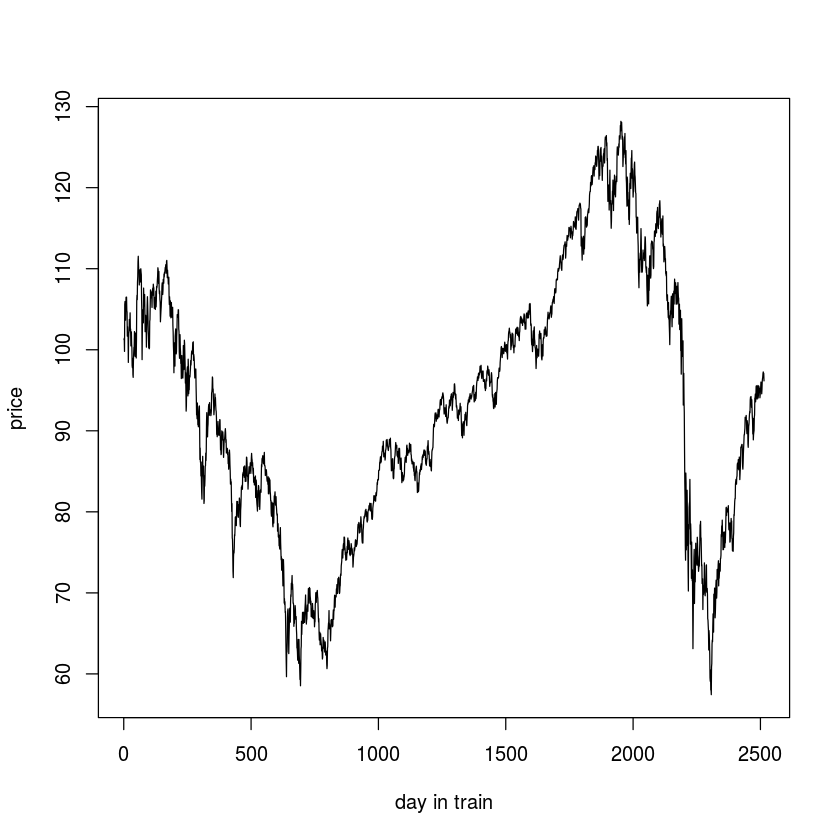

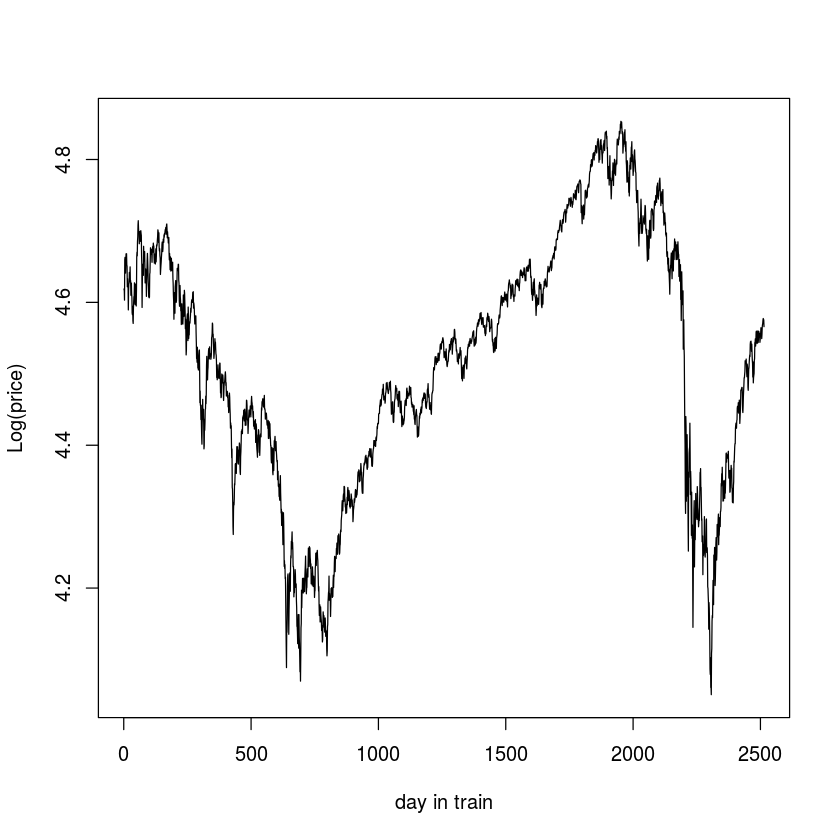

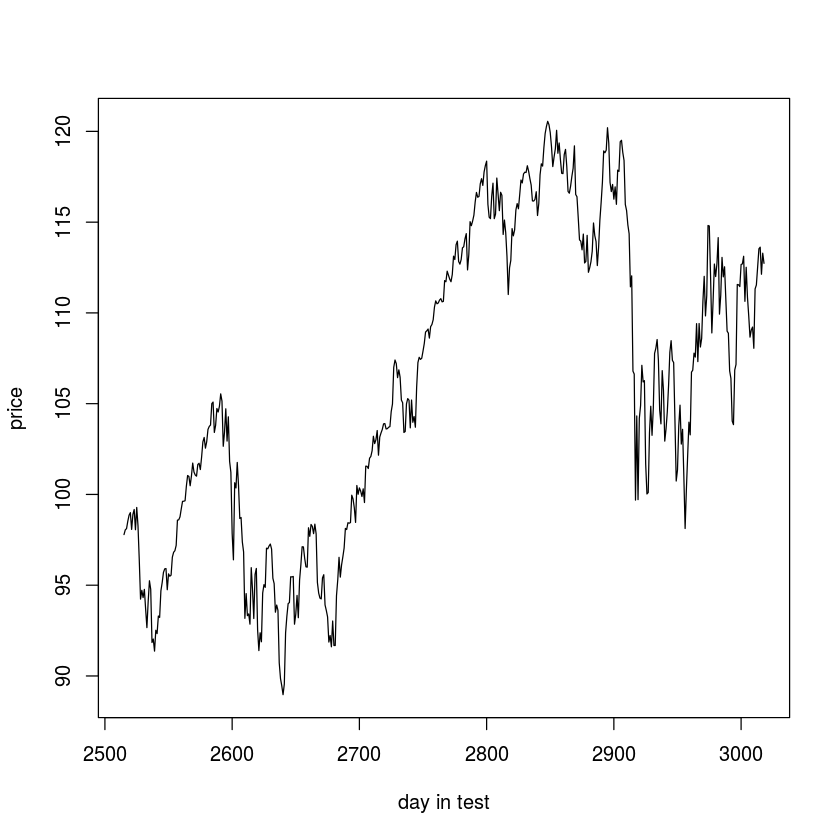

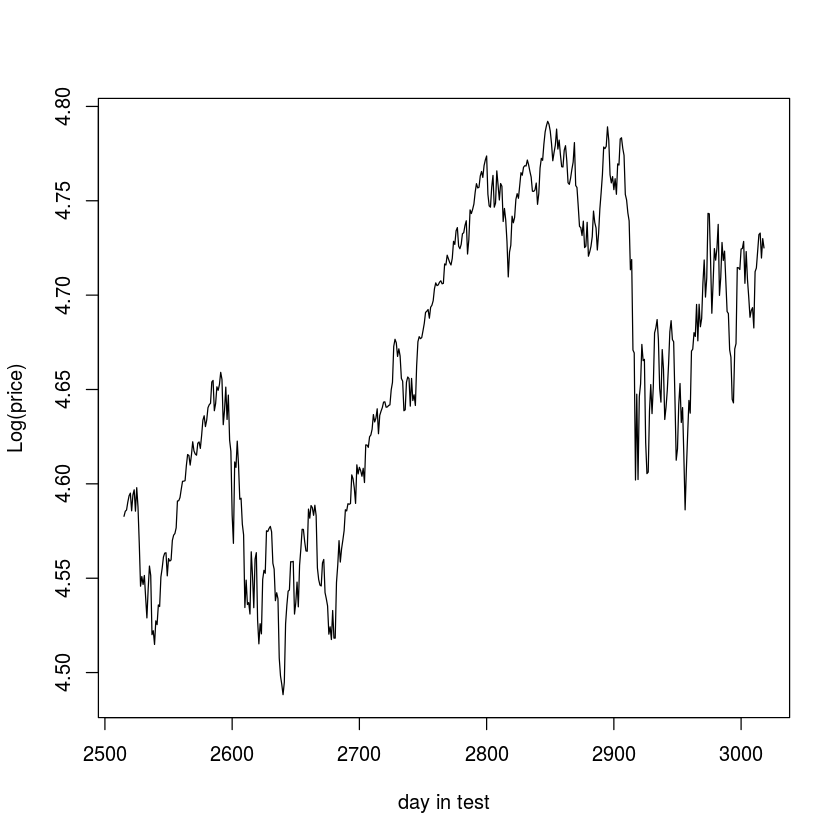

In [217]:
#install.packages('tseries')
#install.packages('CombMSC')
library(CombMSC)
library(tseries)
library(zoo)


spy = get.hist.quote(instrument = "SPY", "2000-01-04", "2011-12-31",quote = c("AdjClose"),
provider = c("yahoo"), method = NULL, compression = "d",
retclass = c("zoo"), quiet = FALSE, drop = FALSE)

#spy$train_test = get.hist.quote(instrument = "spy$train", "2011-01-01", "2011-12-31",quote = c("AdjClose"),
#provider = c("yahoo"), method = NULL, compression = "d",
#retclass = c("zoo"), quiet = FALSE, drop = FALSE)


#spy$train =ts(spy$train, frequency=7)

test_len = 504

spy = ts(coredata(spy), frequency = 1)
spy = splitTrainTest(spy, numTrain = length(spy) - test_len)
#spy$train
#spy$test

plot(spy$train,ylab='price', xlab='day in train')
plot(log(spy$train), ylab="Log(price)", xlab="day in train")

plot.ts(spy$test,ylab='price', xlab='day in test')
plot.ts(log(spy$test), ylab="Log(price)", xlab="day in test")


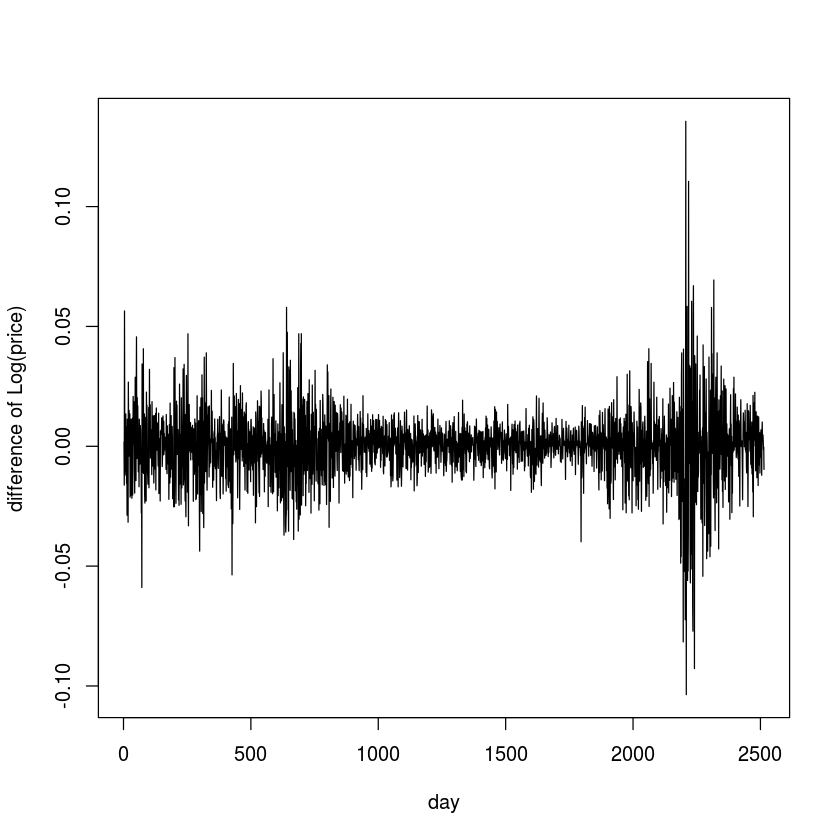

In [218]:
spy$train_diff = diff(log(spy$train))
spy$train_log = log(spy$train)
spy$test_log = log(spy$test)

plot.ts(spy$train_diff,ylab="difference of Log(price)", xlab="day")



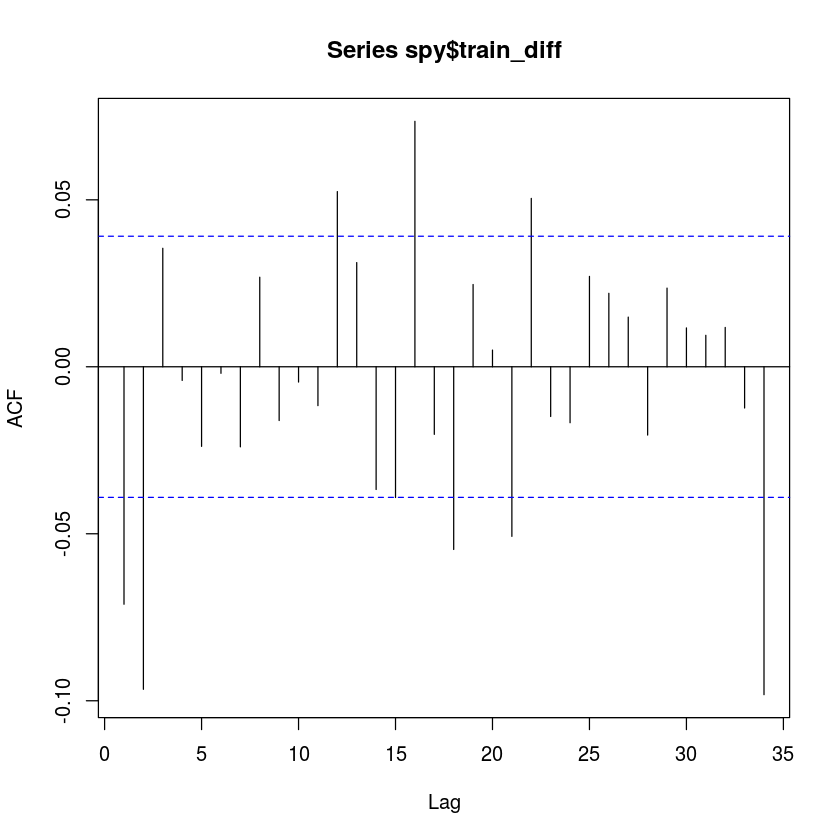

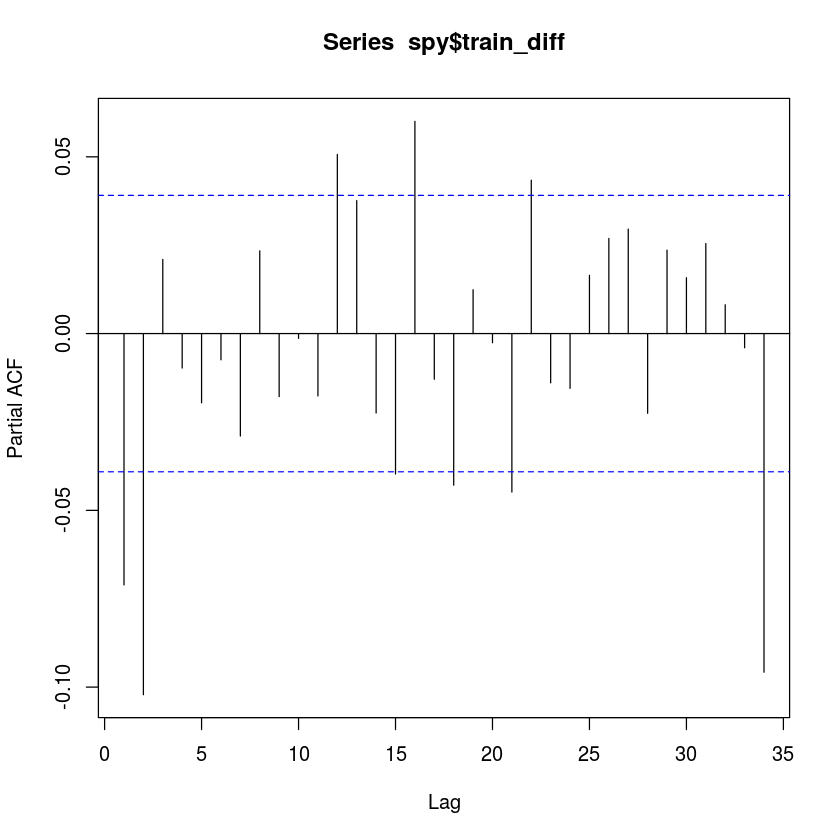

In [219]:
#adf.test(spy$train_diff)
acf(spy$train_diff, na.action= na.pass)
pacf(spy$train_diff, na.action= na.pass)

In [220]:
library(TSA)



eacf(spy$train_diff)

#spy$train_diff

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x o o o o o o o o o  x  o  o 
1 x x o o o o o o o o o  x  x  o 
2 x x o x o o o o o o o  o  o  o 
3 x x x o o o o o o o o  o  o  o 
4 x x x o x o o o o o o  o  o  o 
5 x x x x x x o o o o o  o  o  o 
6 x x x x x x o o o o o  o  o  o 
7 x o x x o x x o o o o  o  o  o 


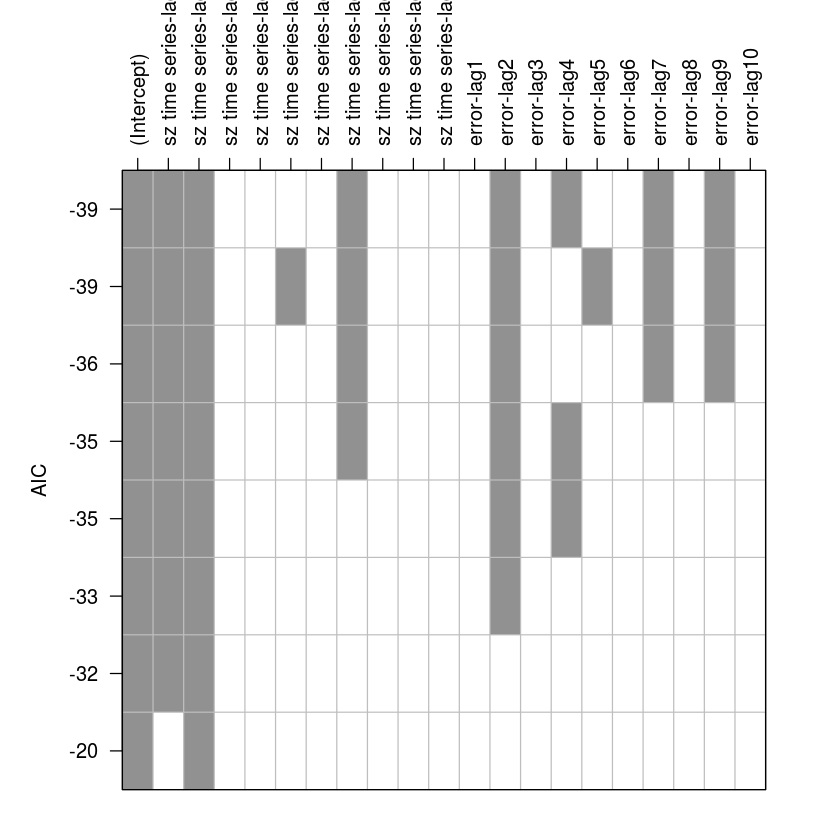

In [221]:
subsets = armasubsets(spy$train_diff, nar=10, nma=10, y.name = "sz time series", ar.method='ols' )
plot(subsets,scale = "AIC")

Series: spy$train_log 
ARIMA(2,1,1)                    

Coefficients:
          ar1      ar2     ma1
      -0.2854  -0.1169  0.2093
s.e.   0.1696   0.0214  0.1705

sigma^2 estimated as 0.0001958:  log likelihood=7164.5
AIC=-14321   AICc=-14320.98   BIC=-14297.68

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-2.132352e-05,0.01398045,0.009450517,-0.001037343,0.2118623,0.9996239,5.009878e-06,NA
Test set,5.302567e-02,0.08920790,0.067877185,1.123987310,1.4519169,7.1796768,9.831585e-01,8.061207


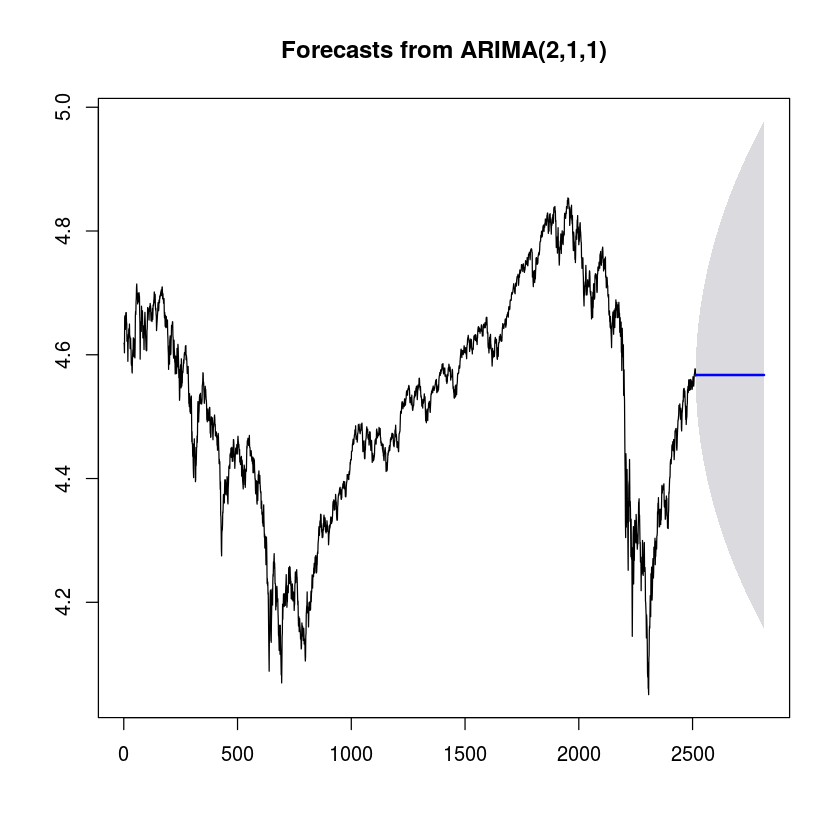

In [222]:
library(forecast)
fit1 = Arima(spy$train_log, order=c(2,1,1))
fit1


fit1_forecast = forecast(fit1, h=300,level=c(0.95))
accuracy(fit1_forecast, spy$test_log)
plot(fit1_forecast)

Series: spy$train_log 
ARIMA(7,1,7)                    

Coefficients:
         ar1     ar2      ar3     ar4      ar5      ar6      ar7      ma1
      0.2385  0.1822  -0.2463  0.6194  -0.3660  -0.5548  -0.0772  -0.3138
s.e.  0.1388  0.1597   0.1599  0.0834   0.1101   0.1587   0.1935   0.1420
          ma2     ma3      ma4     ma5     ma6      ma7
      -0.2471  0.3226  -0.6548  0.3631  0.5992  -0.0316
s.e.   0.1570  0.1619   0.0905  0.1112  0.1586   0.1964

sigma^2 estimated as 0.0001945:  log likelihood=7177.68
AIC=-14325.35   AICc=-14325.16   BIC=-14237.91

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-2.140355e-05,0.01390623,0.009413256,-0.001033933,0.2109778,0.9956826,-0.001820779,NA
Test set,9.245330e-02,0.12201583,0.101237352,1.955437400,2.1493988,10.7083325,0.985148776,9.214964


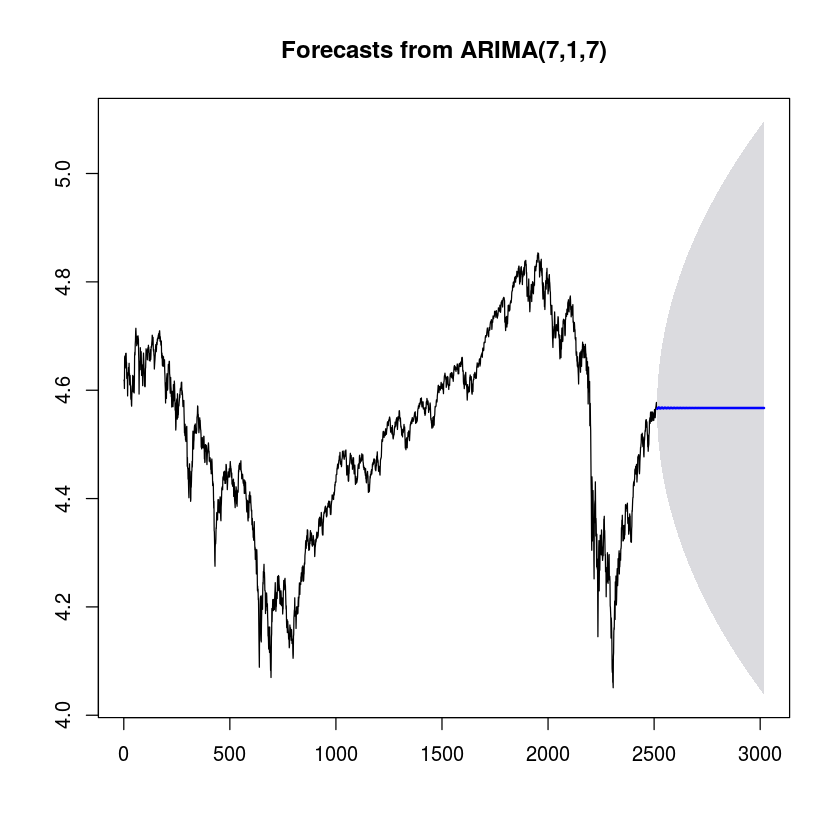

In [223]:
fit2 = Arima(spy$train_log, order=c(7,1,7))
fit2

fit2_forecast = forecast(fit2, h=test_len,level=c(0.95))
accuracy(fit2_forecast, spy$test_log)
plot(fit2_forecast)

Series: spy$train_log 
ARIMA(9,1,0)                    

Coefficients:
          ar1     ar2     ar3      ar4      ar5      ar6      ar7     ar8
      -0.0754  -0.102  0.0188  -0.0116  -0.0238  -0.0069  -0.0290  0.0223
s.e.   0.0199   0.020  0.0201   0.0201   0.0201   0.0201   0.0201  0.0200
         ar9
      -0.018
s.e.   0.020

sigma^2 estimated as 0.0001958:  log likelihood=7167.29
AIC=-14314.58   AICc=-14314.49   BIC=-14256.29

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-2.259957e-05,0.01396488,0.009435347,-0.001087217,0.2115206,0.9980194,-0.0001090535,NA
Test set,9.224805e-02,0.12185947,0.101104462,1.951031652,2.1465853,10.6942761,0.9851275822,9.203148


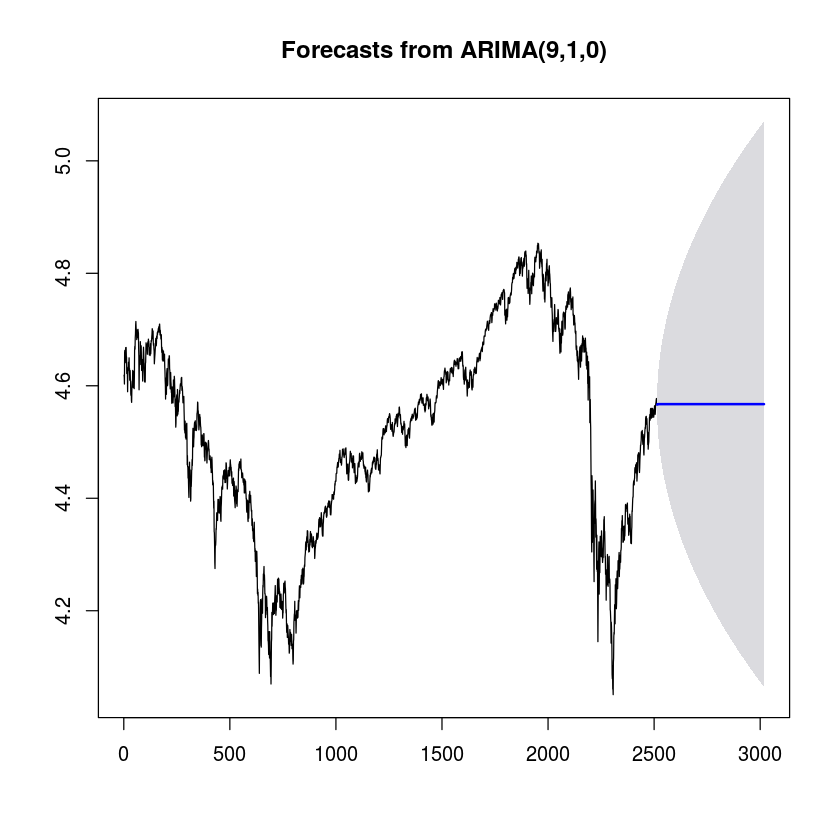

In [224]:
fit3 = Arima(spy$train_log, order=c(9,1,0))
fit3

fit3_forecast = forecast(fit3, h=test_len,level=c(0.95))
accuracy(fit3_forecast, spy$test_log)
plot(fit3_forecast)

Series: spy$train_log 
ARIMA(0,1,9)                    

Coefficients:
          ma1      ma2     ma3      ma4      ma5     ma6      ma7     ma8
      -0.0752  -0.0965  0.0360  -0.0075  -0.0279  0.0005  -0.0189  0.0233
s.e.   0.0199   0.0200  0.0202   0.0203   0.0204  0.0193   0.0214  0.0191
          ma9
      -0.0202
s.e.   0.0214

sigma^2 estimated as 0.0001958:  log likelihood=7167.27
AIC=-14314.54   AICc=-14314.46   BIC=-14256.25

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-2.259957e-05,0.01396488,0.009435347,-0.001087217,0.2115206,0.9980194,-0.0001090535,NA
Test set,9.224805e-02,0.12185947,0.101104462,1.951031652,2.1465853,10.6942761,0.9851275822,9.203148


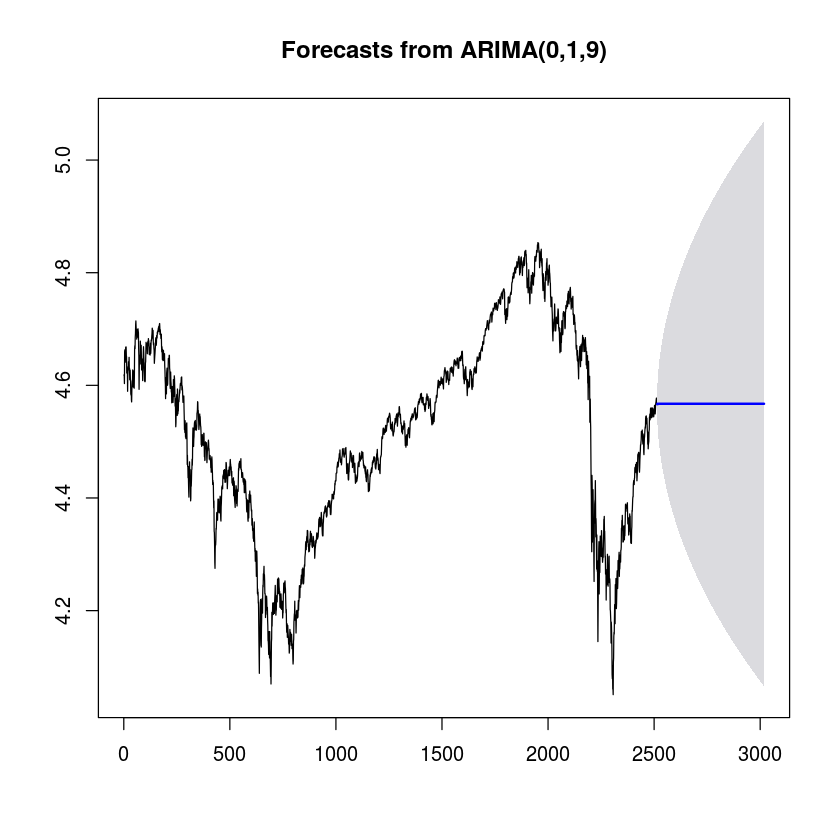

In [225]:
fit4 = Arima(spy$train_log, order=c(0,1,9))
fit4

fit4_forecast = forecast(fit4, h=test_len,level=c(0.95))
accuracy(fit3_forecast, spy$test_log)
plot(fit4_forecast)

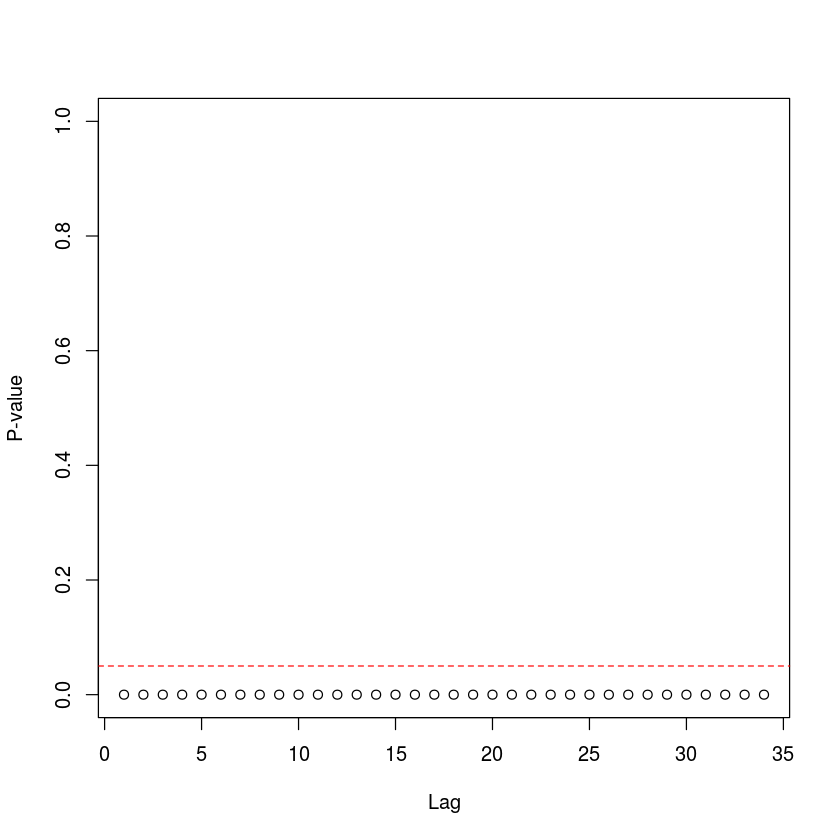

In [226]:
McLeod.Li.test(y = spy$train_diff) # test if ARCH is reasonable



In [227]:
shapiro.test(spy$train_diff) # test if the data's normality


	Shapiro-Wilk normality test

data:  spy$train_diff
W = 0.90914, p-value < 2.2e-16


In [228]:
#install.packages('fBasics')
library(fBasics)

skewness(spy$train_diff) # testing for skewness
kurtosis(spy$train_diff)

[1] 0.09411075
attr(,"method")
[1] "moment"

[1] 9.608214
attr(,"method")
[1] "excess"